# Part I - Ford GoBike System Data
## Fait par MANESSONG Vanessa

## Introduction
Ce notebook effectue une analyse exploratoire sur des données d'un système de partage de vélos couvrant la grande région de la baie de San Francisco.


## Preliminary Wrangling
Dans cette section nous effectuerons un néttoyage de notre dataset. Le nettoyage concernce la correction des erreurs de formatage de type, la mise en ordre des données, le traitement des valeurs manquantes, l'ajout des variables composées si nécessaire.


In [87]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [88]:
# Chargement du dataset fordgobike-tripdata.csv
biketrips = pd.read_csv('fordgobike-tripdata.csv')

In [89]:
# Visualisation de quelques lignes du dataset
biketrips.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [90]:
# Détails du dataset
print(biketrips.shape) # Renseigne sur la forme du dataset

(183412, 16)


In [91]:
# Information du le dataset
biketrips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Observations
- Les colonnes `start_time`, `end_time`, `start_station_id`, `end_station_id`, `bike_id`, `member_birth_year`, `bike_id` n'ont pas des formatages adéquats. De ce fait,
    - `start_time` et `end_time` doivent être de type datetime,  
    - `start_station_id`, `end_station_id`, `bike_id` de type Object afin d'éviter que des opérations de calcul ne leur soient appliquées, 
    - `member_birth_year` de type Int
- Les colonnes `start_station_id`, `end_station_id`, `member_birth_year`, `member_gender`, `member_birth_year ` et `member_gender` semblent avoir des valeurs manquantes.

### Traitement des valeurs manquantes
Il y a 8460 lignes contenant des valeurs nulles dans le dataset. Et cela concerne les colonnes `start_station_id`, `end_station_id`, `member_birth_year`, `member_gender`, `member_birth_year ` et `member_gender`.

In [92]:
# Nombre de lignes avec des données manquantes 
row_with_nan = biketrips.isnull().any(axis=1)
row_with_nan.sum()

8460

In [93]:
# Liste des colonnes avec des données manquantes 
column_with_nan = biketrips.columns[biketrips.isnull().any()]

# Nombre de données manquantes par colonne
for column in column_with_nan:
    print(column, biketrips[column].isnull().sum())
    
out_string = ["Les colonnes 'start_station_id', 'end_station_id ', `member_birth_year` et `member_gender` affichent un assez grand nombre de valeurs manquantes.",
             "Mais ces valeurs n'impactent pas sur les faits qu'on voudrait observer.",
             "On peut donc leur attribuer certaines valeurs sans trop se préoccuper de l'impact à condition de respecter le format."]

print('\n--> Remarque :')
print((" ").join(out_string))

start_station_id 197
start_station_name 197
end_station_id 197
end_station_name 197
member_birth_year 8265
member_gender 8265

--> Remarque :
Les colonnes 'start_station_id', 'end_station_id ', `member_birth_year` et `member_gender` affichent un assez grand nombre de valeurs manquantes. Mais ces valeurs n'impactent pas sur les faits qu'on voudrait observer. On peut donc leur attribuer certaines valeurs sans trop se préoccuper de l'impact à condition de respecter le format.


In [94]:
# Remplissage des valeurs nulles
values = {'start_station_id' : "noid",
          'end_station_id ' : "noid",
          'start_station_name' : "noname", 
          'end_station_name' : "noname", 
          'member_birth_year' : biketrips.member_birth_year.mean(),  # On attribue la moyenne des 'member_birth_year' là où il y a des valeurs manquantes
          'member_gender' : "nogender"}

biketrips = biketrips.fillna(value = values)

### Correction des erreurs de formatages
Il s'agît ici d'attribuer un type de données correct aux variables : `start_time`, `end_time`, `start_station_id`, `end_station_id`, `bike_id`, `member_birth_year`, `bike_id`.

In [95]:
# Formatage des colonnes start_time, end_time en type datetime
biketrips['start_time'] = pd.to_datetime(biketrips['start_time'])
biketrips['end_time'] = pd.to_datetime(biketrips['end_time'])

# Formatage des colonnes start_station_id, end_station_id et bike_id en type object
biketrips['start_station_id'] = biketrips['start_station_id'].astype(str)
biketrips['end_station_id'] = biketrips['end_station_id'].astype(str)
biketrips['bike_id'] = biketrips['bike_id'].astype(str)


# Formatage de la colonne member_birth_year en type int
biketrips['member_birth_year'] = biketrips['member_birth_year'].apply(np.int64)

In [96]:
biketrips.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [97]:
biketrips['start_time'].dt.time

0         17:32:10.145000
1         18:53:21.789000
2         12:13:13.218000
3         17:54:26.010000
4         23:54:18.549000
               ...       
183407    00:04:49.724000
183408    00:05:34.744000
183409    00:06:05.549000
183410    00:05:34.360000
183411    00:00:20.636000
Name: start_time, Length: 183412, dtype: object

In [98]:
# Description du dataset
biketrips.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.770097
std,1794.389780,0.099581,0.117097,0.099490,0.116673,9.887534
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1981.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


### What is the structure of your dataset?

Le dataset possède 183412 enregistrements avec 16 caractisques correspondant aux colonnes. Il s'agît des données sur les trajets individuels effectués dans un système de partage de vélos.

### What is/are the main feature(s) of interest in your dataset?

Dans cette analyse j'aimerais savoir :
- L'influence de l'âge sur le temps mis pour un voyage
- La distance moyenne d'un voyage selon l'âge, le sexe de l'utilisateur
- Les moments où l'on enregistre le plus de voyage en terme de mois de l'année, de jour de la semaine, de temps en une journée.
- L'impact du profil d'un utilisateur sur les différents voyages

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- `start_time` et `end_time` peuvent permettre d'avoir les informations sur les jours, les mois où l'on enregistre le plus de voyage
- `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, `end_station_longitude` aideront à calculer les distances parcourues
- `user_type` permettra mieux observer le comportement des utilisateurs en fonction de leur type
- `member_gender` permettra d'observer l'impact du genre sur l'ensemble des voyages enregistrés
- `member_birth_year` permettra de vérifier si l'âge impacte sur la durée du voyage

#### Quelques fonctions 
Ces fonctions sont nécessaires pour éviter la redondance du code dans ce notebook.

In [99]:
base_color = sb.color_palette()[0]

"""
    Cette fonction permet d'afficher un visuel univarié avec un countplot pour un variable catégorielle
"""
def plot_1_ctplot(variable, xlabel, title):
    # Visualisation avec countplot char il s'agit d'une variable catégorielle
    base_color = sb.color_palette()[0]
    # Ordre dynamique des barres
    freq = biketrips[variable].value_counts()
    order_var = freq.index

    sb.countplot(data = biketrips, x = variable, order = order_var, color = base_color)
    plt.xlabel(xlabel)
    plt.title(title)
    
"""
    Cette fonction permet d'explorer un visuel univarié avec un histogramme
"""
def plot_1_hist(variable, binsize, min_x, xlabel, title):
    bins = np.arange(min_x, biketrips[variable].max()+binsize, binsize)

    plt.figure(figsize=[8, 5])
    plt.hist(data = biketrips, x = variable, bins = bins)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()
    
"""
    Cette fonction permet une visualisation bivariée à l'aide d'un scatter plot
"""
def plot_2_scatter(variable1, variable2, xlim, ylim, xlabel, ylabel, title):
    plt.scatter(data = biketrips, x = variable1, y = variable2, alpha = 1/2)
    if len(xlim) != 0 :
        plt.xlim(xlim)
    if len(ylim) != 0 :
        plt.ylim(ylim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
"""
    Cette fonction permet une visualisation bivariée à l'aide d'un boxplot
"""
def plot_2_boxplot(variable1, variable2, xlim, ylim, xlabel, ylabel, title):
    sb.boxplot(data = biketrips, x = variable1, y = variable2, color = base_color)
    if len(xlim) != 0 :
        plt.xlim(xlim)
    if len(ylim) != 0 :
        plt.ylim(ylim)
    plt.xticks(rotation= 45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

## Univariate Exploration


Le but de nos visualisations univariées est d'observer les distributions des variables d'intérêts qui sont : `duration_sec`, `distance` (qui sera calculer à partir des données sur les lattitudes et longitudes), `member_birth_year`, `user_type`. On pourra aussi observer la distribution selon la variable `member_gender` afin de vérifier si le sexe influence le voyage. La variable `start_time` sera utilisée pour visualier quels sont les moments les plus sollicités pour effectuer un voyage. Ces moments pouvant être le mois de l'année, le jour de la semaine, l'heure dans une journée.

### Distribution de la durée : `duration_sec`
Explorer cette variable permet de visualiser la proportion du temps effectué pour l'ensemble des voyages.

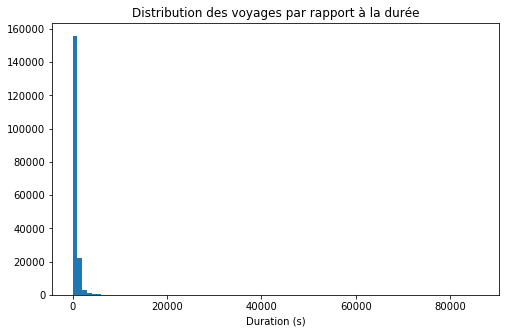

In [100]:
# visualisation de la variable 'duration_sec' avec un simple histogramme
binsize = 1000
bins = np.arange(0, biketrips['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = biketrips, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (s)')
plt.title('Distribution des voyages par rapport à la durée')
plt.show()

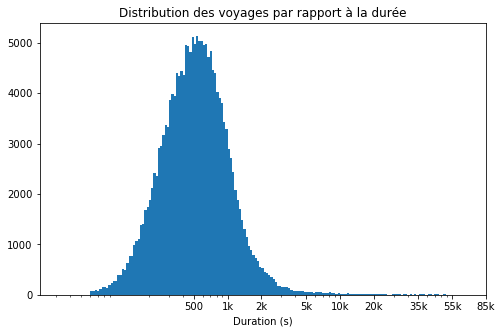

In [101]:
# visualisation sur une échelle logarithmique
log_binsize = 0.020
bins = 10 ** np.arange(1.5, np.log10(biketrips['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = biketrips, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5], [500, '1k', '2k', '5k', '10k', '20k', '35k', '55k', '85k'])
plt.xlabel('Duration (s)')
plt.title('Distribution des voyages par rapport à la durée')
plt.show()

Observation : D'après l'histogramme précédent, on observe qu'il y a un nombre important de voyages avec une durée comprise entre 300s et 1000s. On constate également qu'il y a moins de voyages avec une durée supérieure à 2000s et rès peu voyages de durée supérieure à 10000s

### Distribution de l'âge : `member_birth_year`
La variable `member_birth_year` permet de déterminer l'âge de l'utilisateur au courent de l'année 2019. Il s'agit de l'année où les voyages sont enregistrés dans le dataset.

In [102]:
# Calcul de la colonne age
biketrips['age'] = 2019 - biketrips['member_birth_year']

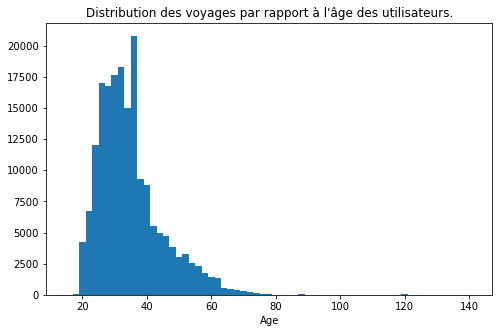

In [103]:
# visualisation de la variable 'age' avec un simple histogramme
plot_1_hist('age', 2, 15, 'Age', 'Distribution des voyages par rapport à l\'âge des utilisateurs.')

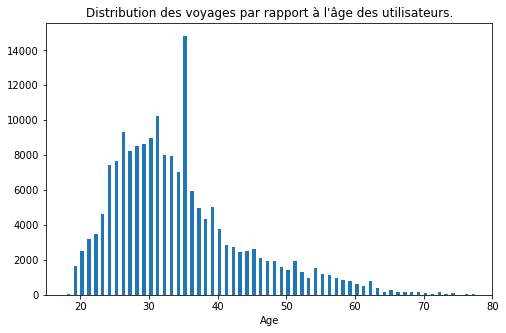

In [104]:
# Visualisation avec des bags plus petits
binsize = 0.5
bins = np.arange(15, 80, 0.5)

plt.figure(figsize=[8, 5])
plt.hist(data = biketrips, x = 'age', bins = bins)
plt.xlim([15, 80]) # Ici on limite l'affichage à 80 ans max
plt.xlabel('Age')
plt.title('Distribution des voyages par rapport à l\'âge des utilisateurs.')
plt.show()


Observation : D'près les deux derniers histogrammes, plus de 14000 utilisateurs sont âgés de 35 ans. La tranche d'âge la plus présente étant [23, 40].

### Distribution de la distance parcourue 
Il est possible d'obtenir cette distance grâce aux variables : `start_station_latitude`, `start_station_longitude`, `end_station_latitude` et `end_station_longitude`.
Ces variables permettront de calculer la variable `distance` qui sera ensuite ajoutée au dataset.

In [105]:
# Cacul et ajout de la colonne 'distance' dans le dataset
import h3 # permet de calculer la distance à partir des lattitudes et longitudes
biketrips['distance'] = biketrips.apply(lambda row : h3.point_dist((row['start_station_latitude'], row['start_station_longitude']), (row['end_station_latitude'], row['end_station_longitude']), unit='m'), axis=1)

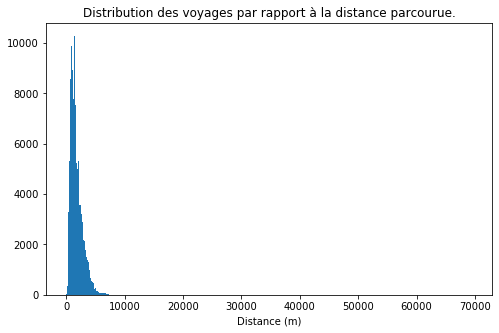

In [106]:
# visualisation de la variable 'distance'
plot_1_hist('distance', 100, 15, 'Distance (m)', 'Distribution des voyages par rapport à la distance parcourue.')

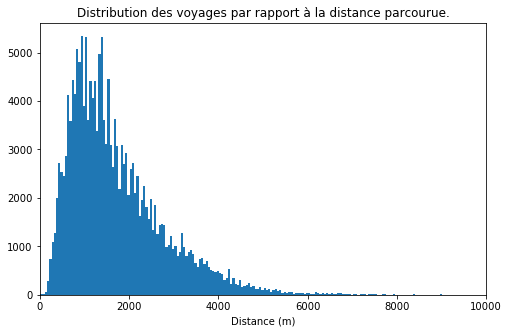

In [107]:
# Visualisation avec les bags plus petits
binsize = 50
bins = np.arange(15, biketrips['distance'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = biketrips, x = 'distance', bins = bins)
plt.xlim([0, 10000]) # Ici on limite l'affichage à 80 ans max
plt.xlabel('Distance (m)')
plt.title('Distribution des voyages par rapport à la distance parcourue.')
plt.show()


Observation : La plupart des voyages s'effectuent sur moins de 4000m.

### Distribution du type d'utisateur : `user_type`
Il est question ici d'observer la proportion des voyages en fonction du fait que l'utilisateur soit un client ou un abonné.

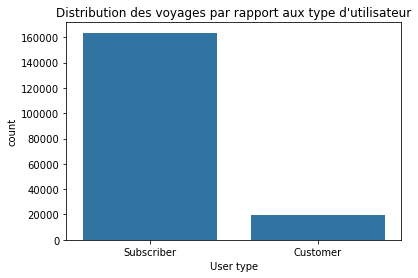

In [108]:
# Visualisation de la variable 'user_type'
plot_1_ctplot('user_type', 'User type', 'Distribution des voyages par rapport aux type d\'utilisateur')

Observation : D'après le graphique à barres précédent, la plupart des voyages sont de type `subscriber`

### Distribution du type d'utisateur : `member_gender`
Il est question ici d'observer la proportion des voyages en fonction du sexe de l'utilisateur.

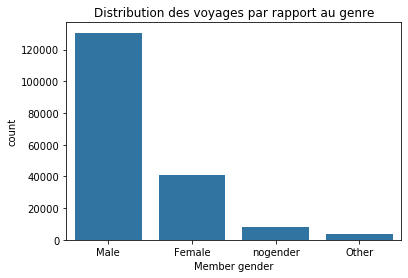

In [109]:
# Visualisation de la variable 'member_gender'
plot_1_ctplot('member_gender', 'Member gender', 'Distribution des voyages par rapport au genre')

Observation : Cette distribution du genre montre que les hommes font plus de voyages que les femmes et les personnes des autres sexe.

### Distribution de la date : `start_time`
Cette distribution permettra d'observer quels sont les moments (mois, jour, heure) les plus sollicités pour commencer un voyage. Pour se faire, nous ajoutons les variables `start_year_month`, `start_week_day` et `start_day_time` au dataset ce qui nous permetta de mener à bien notre opération.

In [110]:
# Ajout des variables 'start_year_month', 'start_day' et 'start_day_time' dans le dataset
biketrips['start_year_month'] = biketrips['start_time'].dt.month
biketrips['start_week_day'] = biketrips['start_time'].dt.weekday + 1
biketrips['start_day_time'] = biketrips['start_time'].dt.hour

Text(0.5, 1.0, 'Distribution par rapport aux heures de la journée')

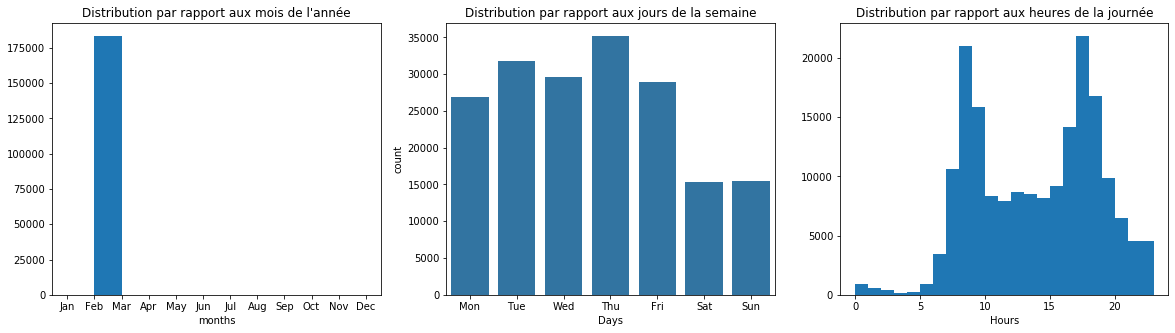

In [111]:
# Visualisation de la distribution de la date
plt.figure(figsize = [20,5])
base_color = sb.color_palette()[0]

# Distribution par rapport aux mois
plt.subplot(1, 3, 1)
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.hist(data = biketrips, x = 'start_year_month', bins = bins)
plt.xticks(bins, ticks) # On renomme les labels exemple 1 = Jan
plt.xlabel('months')
plt.title('Distribution par rapport aux mois de l\'année')

# Distribution rapport aux jours de la semaines
plt.subplot(1, 3, 2)
bins_day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data = biketrips, x = 'start_week_day', color = base_color)
plt.xticks(range(0, len(bins_day)), bins_day)
plt.xlabel('Days')
plt.title('Distribution par rapport aux jours de la semaine')

# Distribution rapport aux heures de la journée
plt.subplot(1, 3, 3)
bins_hour = np.arange(0, 24, 1)
plt.hist(data = biketrips, x = 'start_day_time', bins = bins_hour)
plt.xlabel('Hours')
plt.title('Distribution par rapport aux heures de la journée')

Observations :

    - Il n'y a des données que pour le mois de février
    - `jeudi` est le jour de la semaine où il y a le plus de voyages
    - On enregistre plus de voyages à partir de `7h` du matin jusqu'à 23h. Les pics de voyages ont lieu entre `8h` et `10h` du matin, puis entre `16h` et `18h` en soirée.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

#### Distribution `duration_sec` : 
L'exploration de la variable `duration_sec` montre qu'un nombre important de voyages avec une durée comprise entre 300s et 1000s. On note également la présence des outliers. Il s'agit des voyages avec une durée supérieure à 5000s et qui sont très peu.

#### Distribution `age`
La visualisation de cette variable nous renseigne que la plupart des voyageurs ont entre 23 et 40 ans. Et que les personnes de 35 ans sont celles qui effectuent le plus de voyages.

#### Distribution `distance`
Beaucoup de voyages entreprennent des voyages de moins de 4000m.

#### Distribution `User_type`
Ici, les utilisateurs de type 'subscriber' effectuent plus de voyages que les utilisateurs de type 'customer'

#### Distribution `member_gender`
On a pu observer grâce cette visualisatio que les hommes voyages plus que les femmes et les personnes de genre de type 'other' sont très peu représentées.

#### Distribution `start_time`
L'exploration des différentes dates de départ montre que les gens préfèrent entreprendre un voyage pendant les jours ordinaires tels : lundi, mardi, mercredi, jeudi et vendredi. Le jeudi étant le jour le plus sollicité pour engager un voyage. D'autre part, les voyages sont généralement enregistrés entre `7h` du matin et 23h et beaucoup plus entre `8h` et `10h` du matin, puis entre `16h` et `18h` en soirée.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Dans le cas de notre dataset, la distribution des vayages par aux mois n'est pas nécessaire, vu qu'il n'y a que les voyages du mois de févréier qui sont enregistrés.
- J'ai effectué des opérations de transformation telles que:
        - l'ajout de la variable composée `distance` à partir des variables `start_station_latitude`, `start_station_longitude`, `end_station_latitude` et `end_station_longitude`. Le but de cette opération était de pouvoir visualiser la distribution des voyages par rapport aux différentes distances parcourue. 
        - l'ajout des variables `start_year_month`, `start_week_day`, `start_day_time`. Cette opération a permis de mieux visualiser l'influence du mois, du jour de la semaine, du temps dans sur journée sur la décision d'effectuer un voyage
        - l'ajout de la variable `age` : cette variable a permis de visualiser si l'âge des utilisateurs a un impact sur les voyages enregistrés.


## Bivariate Exploration

Dans cette section, nous allons explorer d'une part la distribution de la distance parcourue par rapport à d'autres variables. Et d'autre part, la distribution de la durée du voyage parcourue par rapport à certaines variables telle que 'member_gender' par exemple.  

#### Distribution : `duration_sec` & `distance`
Nous pensons qu'il absolument nécessaire de visualiser la corrélation entre ces deux variables. 

Text(0.5, 1.0, 'Distribution de la distance par rapport à la durée')

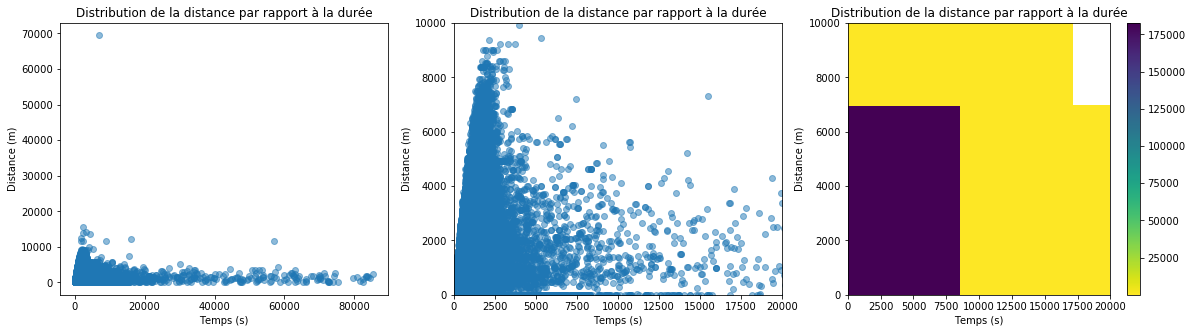

In [112]:
plt.figure(figsize = [20,5])
base_color = sb.color_palette()[0]

# Utilisation d'un scatter plot pour visualiser la distribution des variables 'duration_sec' & 'distance'
plt.subplot(1,3,1)
plot_2_scatter('duration_sec', 'distance', [], [], 'Temps (s)', 'Distance (m)', 'Distribution de la distance par rapport à la durée')

# Focus sur la zone ayant le plus de voyages 
plt.subplot(1,3,2)
plot_2_scatter('duration_sec', 'distance', [0, 20000], [0, 10000], 'Temps (s)', 'Distance (m)', 'Distribution de la distance par rapport à la durée')

# utilisation d'un autre visuel pour mieux observer la distribution
plt.subplot(1,3,3)
bins_x = np.arange(1000, biketrips['duration_sec'].max()+100, 100) 
bins_y = np.arange(100, biketrips['distance'].max()+100, 100) 
plt.hist2d(data = biketrips, x = 'duration_sec', y = 'distance', cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.xlim([0, 20000])
plt.ylim([0, 10000])
plt.xlabel('Temps (s)')
plt.ylabel('Distance (m)')
plt.title('Distribution de la distance par rapport à la durée')

Observation : D'après les diagrammes précédents, on peut voir que les distances de près dans [8000, 10000[ sont généralement effectuées en moins de 2500s. On observe une augmentation du temps de parcours pour les distances de moins de 6000m.

#### 
   > #### Note : Désormais l'exploration de la distance se fera dans l'intervalle [0, 10000], car on remarque une meilleure concentration des voyages ayant une distance comprise dans cet intervalle.

#### Distribution : `age` & `distance`

Text(0.5, 1.0, 'Distribution de la distance vs Age')

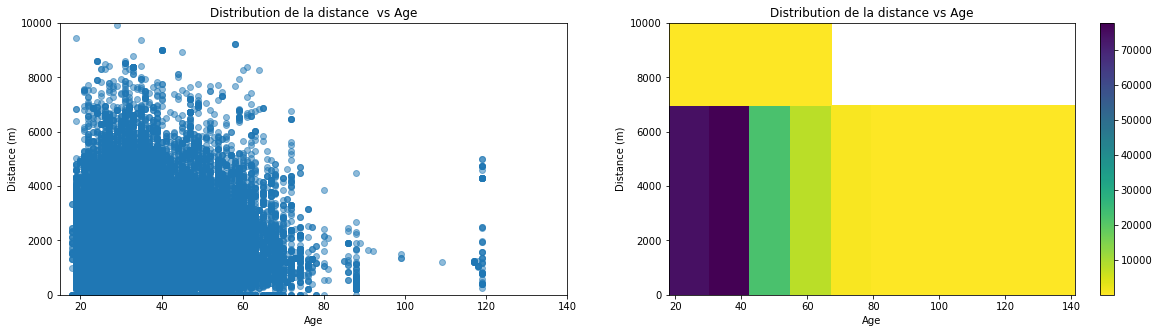

In [113]:
plt.figure(figsize = [20,5])

# Visualisation de la distribution de l'âge par rapport à la distance parcourue

# focus sur les intervalles [15, 80] pour l'âge et [0, 10000] pour les distances
plt.subplot(1,2,1)
plot_2_scatter('age', 'distance', [15, 140], [0, 10000], 'Age', 'Distance (m)', 'Distribution de la distance  vs Age')

# Utilisation d'un autre visuel pour mieux observer la correlation
plt.subplot(1,2,2)
plt.hist2d(data = biketrips, x = 'age', y = 'distance', cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.ylim([0, 10000])
plt.xlabel('Age')
plt.ylabel('Distance (m)')
plt.title('Distribution de la distance vs Age')

Observation : Les personnes dont l'âge se trouve dans l'intervalle ]20, 43[ sont celles qui effectuent les plus longues distances, suivi des personnes dont la tranche d'âge est dans [43, 64]. Les personnes de plus 65 ans pratiquent moins des longues distances.



#### Distribution : `member_gender` & `distance`

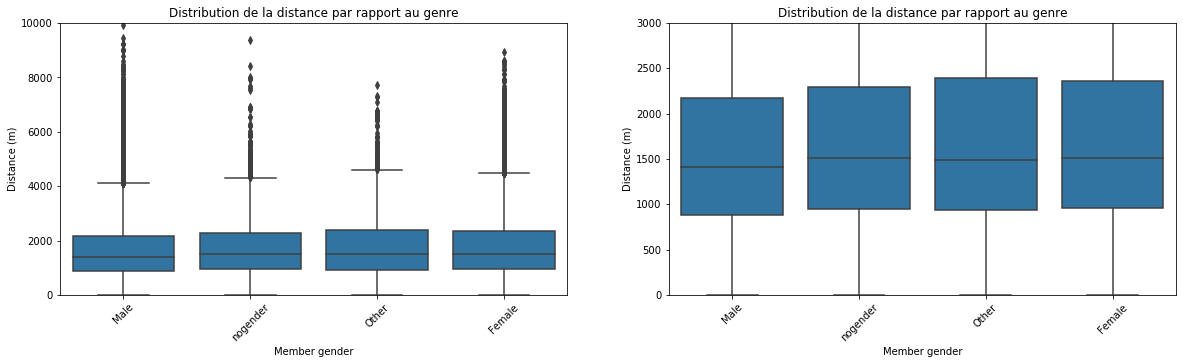

In [114]:
# Distribution de la distance parcourue par rapport au sexe
plt.figure(figsize = [20, 5])

# Visualisation à l'aide d'un boxplot
plt.subplot(1, 2, 1)
plot_2_boxplot('member_gender', 'distance', [], [0, 10000], 'Member gender', 'Distance (m)', 'Distribution de la distance par rapport au genre')

# Focus sur les zones ayant une forte concentration de voyages
plt.subplot(1, 2, 2)
plot_2_boxplot('member_gender', 'distance', [], [0, 3000], 'Member gender', 'Distance (m)', 'Distribution de la distance par rapport au genre')

Observation : Bien que proche de la moyenne des distances parcourues par les femmes, la distance moyenne que parcourt généralement les hommes est plus petite que celle parcourue par les femmes.

#### Distribution : `member_gender` & `duration_sec`

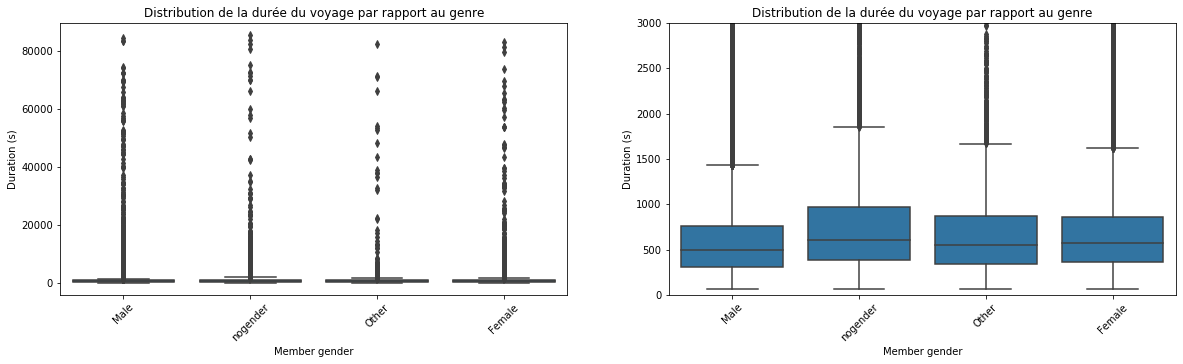

In [115]:
# Visualisation de la durée du voyage par au sexe
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
plot_2_boxplot('member_gender', 'duration_sec', [], [], 'Member gender', 'Duration (s)', 'Distribution de la durée du voyage par rapport au genre')

# Focus sur les zones ayant une forte concentration de voyages
plt.subplot(1, 2, 2)
plot_2_boxplot('member_gender', 'duration_sec', [], [0, 3000], 'Member gender', 'Duration (s)', 'Distribution de la durée du voyage par rapport au genre')

Observation : La moyenne des hommes mettent moins de temps à finaliser leurs voyages contrairement aux femmes.

#### Distribution : `user_type` & `distance`

Text(0.5, 1.0, "Distribution de la distance par rapport au type de l'utilisateur")

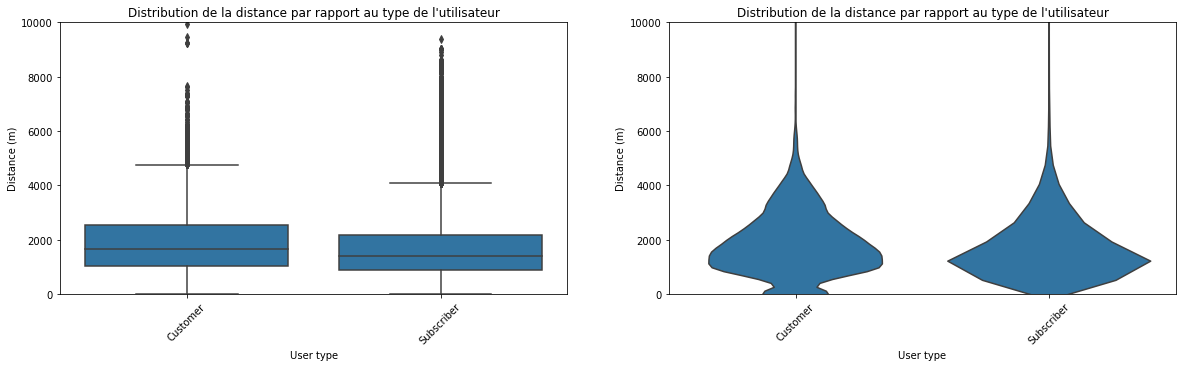

In [116]:
# Distribution de la distance par rapport au type d'utilisateur
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
plot_2_boxplot('user_type', 'distance', [], [0, 10000], 'User type', 'Distance (m)', 'Distribution de la distance par rapport au type de l\'utilisateur')

plt.subplot(1, 2, 2)
sb.violinplot(data = biketrips, x = 'user_type', y = 'distance', color = base_color, inner = None)
plt.ylim([0, 10000])
plt.xticks(rotation= 45)
plt.xlabel('User type')
plt.ylabel('Distance (m)')
plt.title('Distribution de la distance par rapport au type de l\'utilisateur')

Observation : Les utilisateurs de types 'Customer' ont tendance à parcourir une distance plus longue que les utilisateurs de type 'Subscriber'.

#### Distribution : `start_week_day` & `distance`

Text(0.5, 1.0, 'Distribution par rapport aux jours de la semaine')

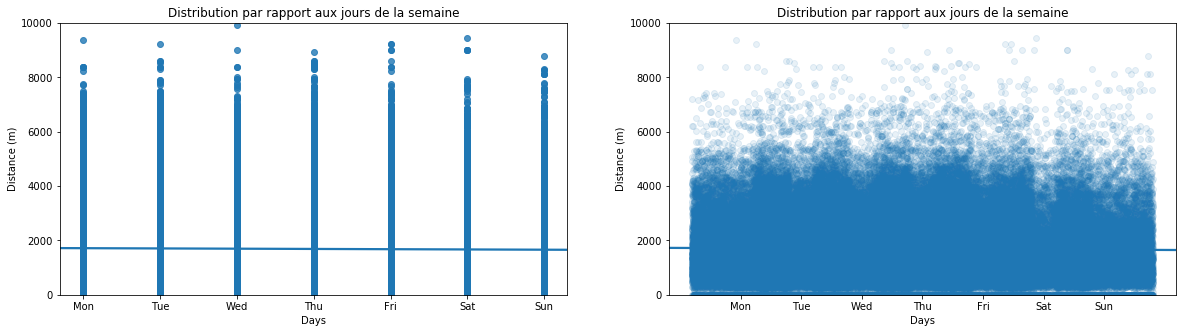

In [117]:
# Visualisation de la distance par rapport au jour de la semaine
plt.figure(figsize = [20,5])
base_color = sb.color_palette()[0]

# Visualisation à l'aide d'un regplot
plt.subplot(1, 2, 1)
bins_day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.regplot(data = biketrips, x = 'start_week_day', y = 'distance')
plt.ylim([0, 10000])
plt.xticks(range(1, len(bins_day)+1), bins_day)
plt.xlabel('Days')
plt.ylabel('Distance (m)')
plt.title('Distribution par rapport aux jours de la semaine')

# Utilisation de la transparence pour observer la concentration
plt.subplot(1, 2, 2)
bins_day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.regplot(data = biketrips, x = 'start_week_day', y = 'distance', truncate = False, x_jitter = 0.8, scatter_kws = {'alpha':1/10})
plt.ylim([0, 10000])
plt.xticks(range(1, len(bins_day)+1), bins_day)
plt.xlabel('Days')
plt.ylabel('Distance (m)')
plt.title('Distribution par rapport aux jours de la semaine')


Observation : Les weekends semblent ne être moins favorables pour pourcourir de longues distances.

#### Distribution : `start_day_time` & `distance`

Text(0.5, 1.0, 'Distribution la distance par rapport aux heures de la journée')

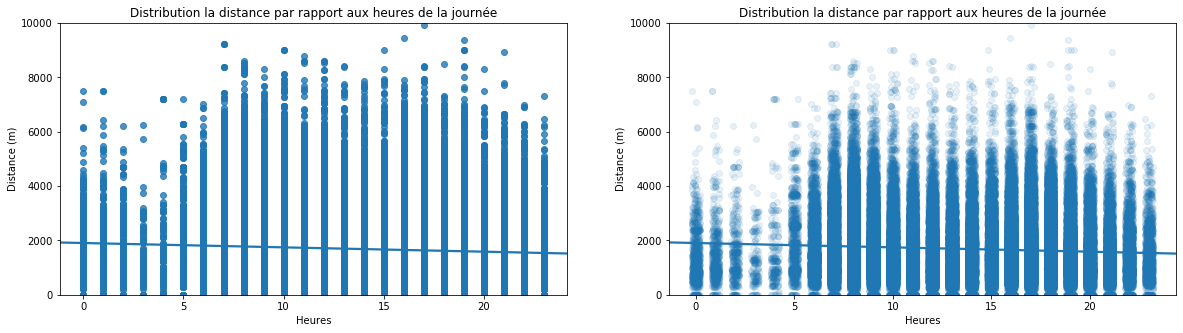

In [118]:
# Distribution de la distance par rapport à l'heure dans une journée
plt.figure(figsize = [20,5])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.regplot(data = biketrips, x = 'start_day_time', y = 'distance', color = base_color)
plt.ylim([0, 10000])
plt.xlabel('Heures')
plt.ylabel('Distance (m)')
plt.title('Distribution la distance par rapport aux heures de la journée')

# Utilisation de la transparence pour observer la concentration
plt.subplot(1, 2, 2)
sb.regplot(data = biketrips, x = 'start_day_time', y = 'distance', truncate = False, x_jitter = 0.2, scatter_kws = {'alpha':1/10})
plt.ylim([0, 10000])
plt.xlabel('Heures')
plt.ylabel('Distance (m)')
plt.title('Distribution la distance par rapport aux heures de la journée')


Observation: Les voyages de plus longue distance sont entrepris entre entre 7h et 8h puis entre 16h et 17h 

#### Distribution : `member_gender` & `user_type`
Ici nous créeons un dataframe qui contient des données sur les types d'utilisateurs et leur genre. Nous utilisons ensuite un visuel de type `heatmap` pour observer la correlation entre les différents utilisateurs. 

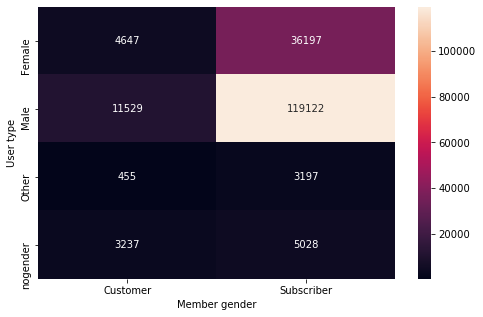

In [119]:
# Obtenir les données sur les types d'utilisateurs et leur genre
user_counts = biketrips.groupby(['member_gender', 'user_type']).size()
# conversion de user_counts en un objet dataframe
user_counts = user_counts.reset_index(name = 'count')
#Réorganisation des données avec df.pivot()
user_counts = user_counts.pivot(index = 'member_gender', columns = 'user_type', values = 'count')
user_counts
# Visualisation à l'aide d'un heatmap
plt.figure(figsize = [8, 5])
sb.heatmap(user_counts, annot = True, fmt = 'd')

# Confiration éviter que le diagramme soit coupé en haut et en  bas
b, t = plt.ylim() 
b += 0.5
t -= 0.5 
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.xlabel('Member gender')
plt.ylabel('User type')
plt.show()

Observation : Les utilisateurs sont majoritairement des hommes et sont de type 'Subscriber'

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- `duration_sec` & `distance` : Un fait curieux entre ces deux variables est les distances les plus courtes prennent plus de temps pour être parcourues. Et les distances les plus longues avoisinantes à 10000m mettent moins de temps pour être achevées.

- `age` & `distance` : Les personnes les plus âgés parcourent moins de grandes distances. Contrairement aux personnes dont l'âge est dans l'intervalle ]20, 43[.

- `user_type` & `distance` : Les plus longues distances sont majoritairement parcourues par les utilisateurs de type 'customer'. Bien que la majorité des voyages soient effectués par les subscribers.

- `start_day_time` & `distance` : Les distances parcourues pendant les weekends sont moins grandes que celles parcourues les autres jours de la semaine. Et l'on observe aussi moins de voyages pendant le weekend.

- `start_day_time` & `distance` : Les voyages de plus longues distances sont entrepris entre entre 7h et 8h du matin puis entre 16h et 17h.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Le dernier visuel nous renseigne que les utilisateurs sont majoritaires des hommes et sont de type 'Subscriber'. Les 'Subscriber' étant plus nombreux que les 'customer' dans le dataset. La moyenne des hommes entreprennent moins des voyages de longues distances par rapport à la moyenne des femmes.

#### Distribution : `distance` & `duration_sec` & `age`

Text(0.5, 1, "Distribution de la distance et la durée par rapport à l'âge.")

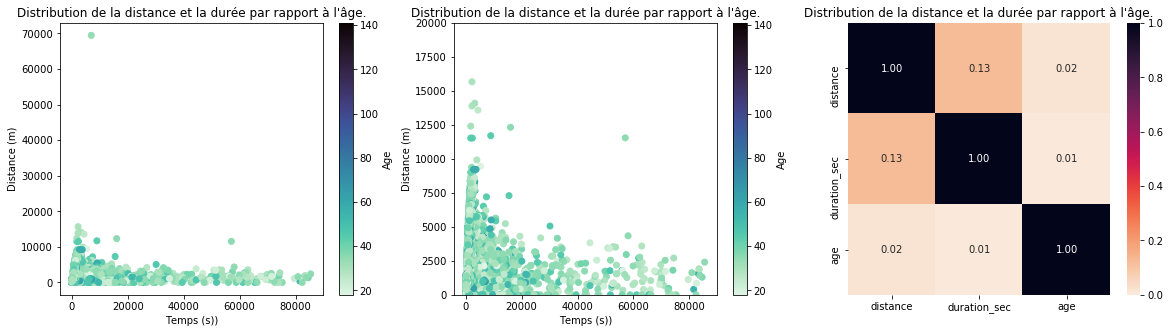

In [125]:
plt.figure(figsize = [20, 5])

plt.subplot(1,3,1)
plt.scatter(data = biketrips, x = 'duration_sec', y = 'distance', c = 'age', cmap = 'mako_r')
plt.colorbar(label = 'Age')
plt.xlabel('Temps (s))')
plt.ylabel('Distance (m)')
plt.title('Distribution de la distance et la durée par rapport à l\'âge.')

# Focus sur la zone ayant une concentration de voyages
plt.subplot(1,3,2)
plt.scatter(data = biketrips, x = 'duration_sec', y = 'distance', c = 'age', cmap = 'mako_r')
plt.ylim([0, 20000])
plt.colorbar(label = 'Age')
plt.xlabel('Temps (s))')
plt.ylabel('Distance (m)')
plt.title('Distribution de la distance et la durée par rapport à l\'âge.')

# Utilisation d'un Heatmap pour mieux observer les relations
plt.subplot(1,3,3)
bike_stats = ['distance', 'duration_sec', 'age']
sb.heatmap(biketrips[bike_stats].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f', vmin = 0)
b, t = plt.ylim() 
b += 0.5
t -= 0.5 
plt.ylim(b, t)
plt.title('Distribution de la distance et la durée par rapport à l\'âge.')

Observation : Le heatmap ci-dissus montre une faire correlation entre les variables `distance`, `duration_sec` et `age`. Néanmoins, l'on peut qu'à même observer une légère correlation entre `distance` et `duration_sec`.

#### Distribution : `user_type` & `age` & `member_gender`

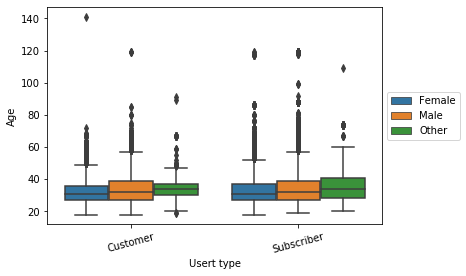

In [121]:
sb.boxplot(data = biketrips, x = 'user_type', y = 'age', hue = 'member_gender', hue_order = ['Female', 'Male', 'Other'])
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15)
plt.xlabel('Usert type')
plt.ylabel('Age');

Observation : Les femmes qui participent aux voyagent sont généralement plus jeunes que les voyageurs hommes et ceux des autres genre. Toute fois, tous les genres sont majoritairement des utilisateurs de type 'subscriber'.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

La variable `distance` est affaiblement correlée à la variable `duration_sec`. Toute fois ces deux variables ne sont pratiquement pas correlées à la variable `age`.
Aussi on a pu observer que les voyages les plus actifs sont de type 'subscriber' et sont majoritaires les utilisateurs de genre masculin. Par contre les personnes les plus jeunes sont majoritairements les femmes.

### Were there any interesting or surprising interactions between features?

- Les plus longues distances parcourues ont un temps plus petits que les trajets plus courts.
- Il y a des très peu de corrélation entre nos différentes variables. Ceci serait dû au fait que nous n'avons des données que sur le mois de février.

### Copie du dataset nettoyé
Après avoir effectué le nettoyage du dataset, il est toujours prudent d'effectuer une copie et la sauvegarder.

In [122]:
# Sauvegarde du dataset nettoyé dans un fichier csv
#biketrips.to_csv('biketrips_clean.csv')